In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
!pip install librosa

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='0/0_0.wav'

In [2]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 7A9B-4D74

 Directory of C:\Users\Parth\Downloads\Snoring Dataset

11/06/2024  05:08 PM    <DIR>          .
11/06/2024  05:08 PM    <DIR>          ..
11/06/2024  05:08 PM    <DIR>          .ipynb_checkpoints
11/06/2024  04:49 PM    <DIR>          0
11/06/2024  04:49 PM    <DIR>          1
11/06/2024  05:07 PM         1,089,844 Audio Classification EDA.ipynb
11/06/2024  04:49 PM             1,953 Snoring_dataset.txt
               2 File(s)      1,091,797 bytes
               5 Dir(s)  96,126,369,792 bytes free


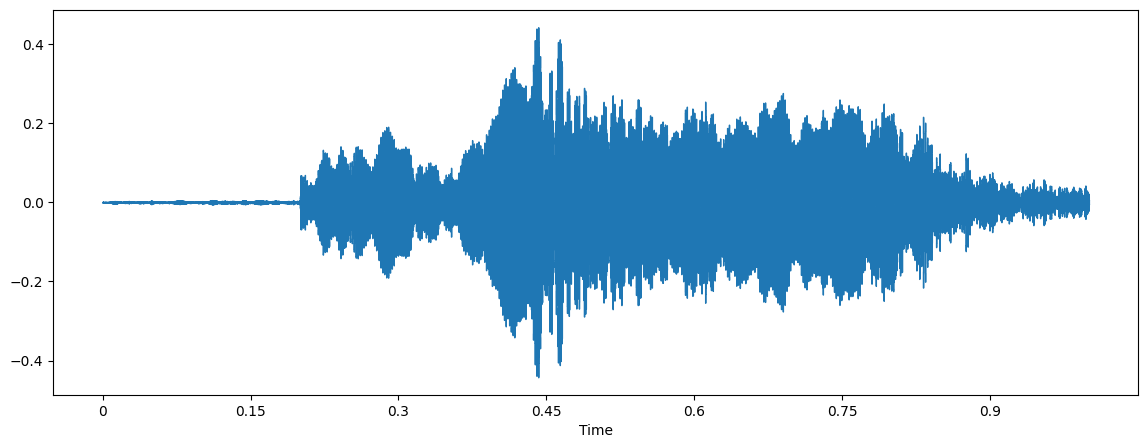

In [7]:
### Dog Sound
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

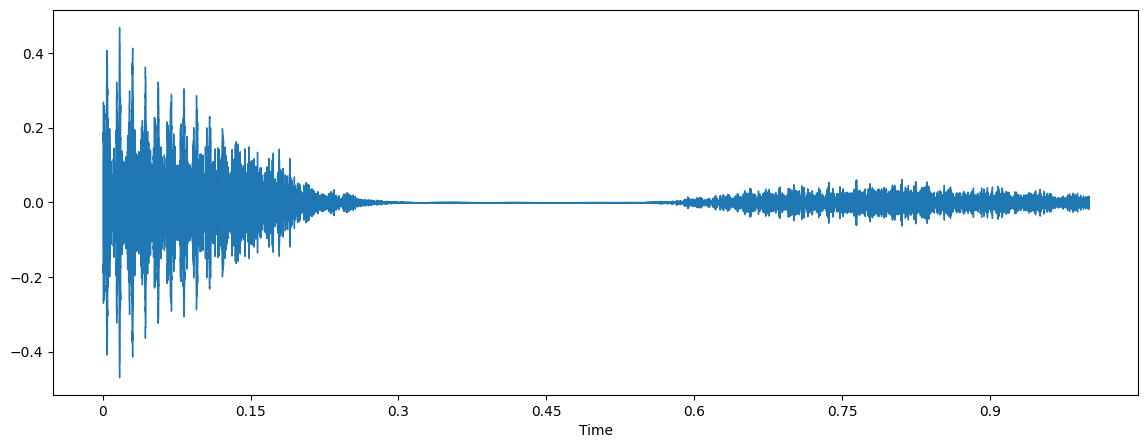

In [8]:
### Sound
filename='1/1_1.wav'
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [9]:
sample_rate

22050

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

C:\Users\Parth\AppData\Local\Temp\ipykernel_43416\1160942666.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  wave_sample_rate, wave_audio=wav.read(filename)


In [11]:
wave_sample_rate

48000

In [12]:
wave_audio

array([5241, 4614, 3675, ...,  327,  252,  176], dtype=int16)

In [13]:
data

array([0.10936615, 0.12007691, 0.09233347, ..., 0.01279268, 0.01337431,
       0.00806325], dtype=float32)

In [19]:
import pandas as pd

metadata=pd.read_csv('0/0_0.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [28]:
import os
import pandas as pd

# Define paths to the folders
folder_0 = "0"
folder_1 = "1"

# Initialize lists to store folder numbers, file names, paths, labels, and class IDs
folder_numbers = []
file_names = []
file_paths = []
labels = []
class_ids = []

# Read files from folder "0" and label them "not snoring" with class ID 0
for filename in os.listdir(folder_0):
    if filename.endswith(".wav"):
        file_paths.append(os.path.join(folder_0, filename))
        folder_numbers.append(0)
        file_names.append(filename)
        labels.append("not snoring")
        class_ids.append(0)

# Read files from folder "1" and label them "snoring" with class ID 1
for filename in os.listdir(folder_1):
    if filename.endswith(".wav"):
        file_paths.append(os.path.join(folder_1, filename))
        folder_numbers.append(1)
        file_names.append(filename)
        labels.append("snoring")
        class_ids.append(1)

# Create a DataFrame
df = pd.DataFrame({
    "folder_number": folder_numbers,
    "file_name": file_names,
    "label": labels,
    "class_id": class_ids
})

# Display the first few rows of the DataFrame
print(df.head())

# Optionally, save the DataFrame to a CSV file
df.to_csv("snoring_dataset.csv", index=False)

print("DataFrame created successfully and saved as 'snoring_dataset.csv'")


   folder_number  file_name        label  class_id
0              0    0_0.wav  not snoring         0
1              0    0_1.wav  not snoring         0
2              0   0_10.wav  not snoring         0
3              0  0_100.wav  not snoring         0
4              0  0_101.wav  not snoring         0
DataFrame created successfully and saved as 'snoring_dataset.csv'


In [29]:
print(df.tail())

     folder_number file_name    label  class_id
995              1  1_95.wav  snoring         1
996              1  1_96.wav  snoring         1
997              1  1_97.wav  snoring         1
998              1  1_98.wav  snoring         1
999              1  1_99.wav  snoring         1


In [30]:
### Check whether the dataset is imbalanced
df['label'].value_counts()

not snoring    500
snoring        500
Name: label, dtype: int64

In [31]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='0/0_0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [32]:
print(librosa_audio_data)

[-0.00058085 -0.0005061  -0.00013978 ...  0.00481338  0.00568892
  0.00400298]


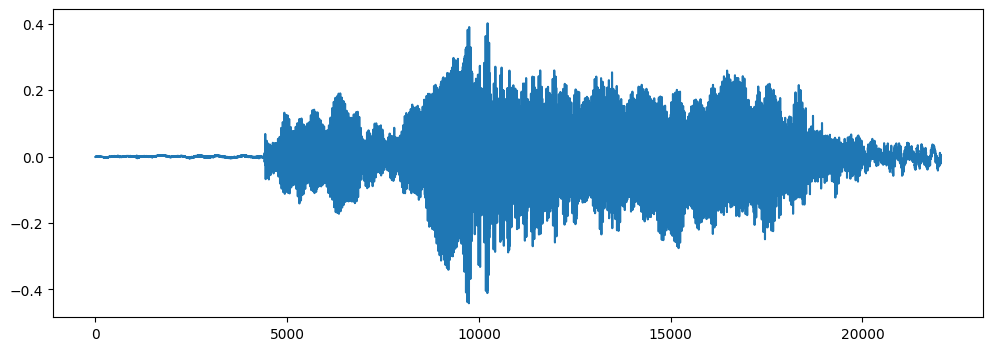

In [33]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [3]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

NameError: name 'audio_file_path' is not defined

In [35]:
wave_audio

array([[-14, -38],
       [ -2, -42],
       [  4, -36],
       ...,
       [ 98, 220],
       [ 50, 186],
       [ 14, 230]], dtype=int16)

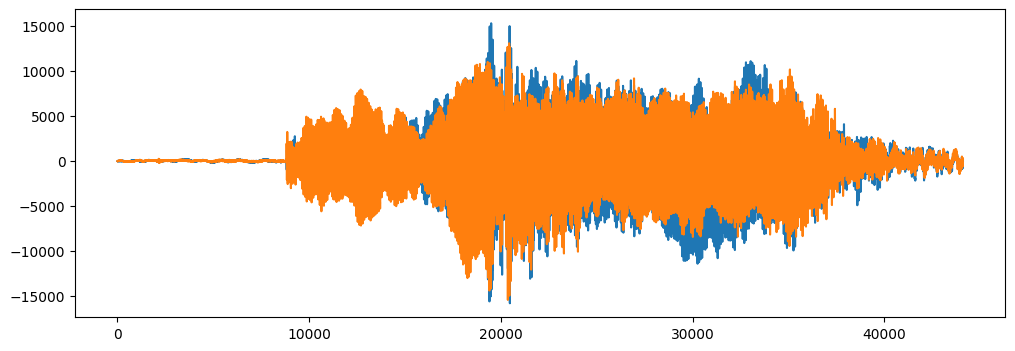

In [36]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [37]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 44)


In [38]:
mfccs

array([[-573.065    , -526.85205  , -506.61462  , ..., -268.40668  ,
        -281.37784  , -316.15845  ],
       [  50.103355 ,   44.698303 ,   33.89879  , ...,  113.46992  ,
         108.5787   ,  107.206665 ],
       [   8.974894 ,    2.921738 ,   11.461069 , ...,  -18.798307 ,
         -14.936453 ,  -14.878951 ],
       ...,
       [  -2.7268183,    2.671946 ,   -1.8018122, ...,   -3.2871678,
          -1.023931 ,    2.9507408],
       [   5.500771 ,    1.833086 ,   -2.4814436, ...,    2.4963071,
           4.1358447,    6.4689417],
       [   7.382628 ,    6.7681775,    2.9618938, ...,   -3.6790442,
          -2.1874247,   -1.136131 ]], dtype=float32)

In [4]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='audio/'
metadata=pd.read_csv('snoring_dataset.csv')
metadata.head()

,fold,slice_file_name,class,classID
0,0,0_0.wav,not snoring,0
1,0,0_1.wav,not snoring,0
2,0,0_10.wav,not snoring,0
3,0,0_100.wav,not snoring,0
4,0,0_101.wav,not snoring,0


In [5]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [6]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1000it [00:36, 27.16it/s]


In [7]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-280.13986, 45.71932, -52.32505, 18.282372, -...",not snoring
1,"[-231.09755, -23.285229, -52.46698, 49.59631, ...",not snoring
2,"[-278.59918, -18.363121, -81.50867, 27.605629,...",not snoring
3,"[-435.14542, 148.7561, 26.24163, 11.780356, 12...",not snoring
4,"[-392.56076, 191.67389, 52.938965, 21.111748, ...",not snoring


In [8]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [9]:
X.shape

(1000, 40)

In [10]:
y

array(['not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snoring',
       'not snoring', 'not snoring', 'not snoring', 'not snori

In [11]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [12]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train

array([[-2.8661328e+02,  9.6493134e+01,  1.5816733e+01, ...,
         5.3363633e-01, -3.1774828e-01, -2.0981912e-01],
       [-2.1069696e+02,  6.5280334e+01, -7.8107176e+00, ...,
        -2.9927673e+00, -3.6869487e-01, -6.2435474e+00],
       [-2.7294113e+02,  1.4479329e+02,  2.2486879e+01, ...,
        -8.9170532e+00, -6.3576589e+00, -4.0615706e+00],
       ...,
       [-8.5480949e+01,  1.7168658e+02, -2.8880243e+01, ...,
        -4.7481027e+00, -2.2321296e+00, -1.5190544e+00],
       [-1.1951778e+02,  1.5460480e+02, -1.8551968e+01, ...,
        -5.3747082e+00, -5.6108755e-01, -3.9953079e+00],
       [-2.4034215e+02,  1.1894402e+02,  2.2002277e+00, ...,
         1.3804889e-01, -2.5474830e+00, -4.0517321e+00]], dtype=float32)

In [15]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [16]:

X_train.shape

(800, 40)

In [17]:

X_test.shape

(200, 40)

In [18]:
y_train.shape

(800, 2)

In [19]:

y_test.shape

(200, 2)

In [20]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [22]:
### No of classes
num_labels=y.shape[1]

In [23]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [24]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [26]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 11.5938 - accuracy: 0.5175
Epoch 1: val_loss improved from inf to 1.64088, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 7s 41ms/step - loss: 11.5938 - accuracy: 0.5175 - val_loss: 1.6409 - val_accuracy: 0.5150
Epoch 2/100
21/25 [========================>.....] - ETA: 0s - loss: 6.1839 - accuracy: 0.5193
Epoch 2: val_loss improved from 1.64088 to 0.92703, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 19ms/step - loss: 6.0408 - accuracy: 0.5200 - val_loss: 0.9270 - val_accuracy: 0.5050
Epoch 3/100
21/25 [========================>.....] - ETA: 0s - loss: 3.6242 - accuracy: 0.5417
Epoch 3: val_loss improved from 0.92703 to 0.72867, saving model to saved_models\audio_classification.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 3.5812 - accuracy: 0.5475 - val_loss: 0.7287 - val_accuracy: 0.5750
Epoch 

In [27]:

test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9850000143051147


In [28]:
prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [29]:
X_test[1]

array([-2.2262660e+02,  1.0122581e+02,  2.0338316e+01,  1.8745619e+01,
       -2.0734331e+01,  1.2272593e+01,  3.7715685e+00,  1.1277618e+01,
        5.2244101e+00,  2.7453712e+01, -1.7436872e+01,  9.6170406e+00,
       -1.1505086e+01,  4.4941649e+00, -3.8372567e+00,  1.4241605e+01,
       -9.1486750e+00,  1.7774500e+01, -1.5956481e+01,  6.9425809e-01,
       -7.5607452e+00,  1.4065170e-01, -3.9479418e+00,  5.9232640e+00,
       -1.6712905e+00,  1.0445799e+01,  7.9801959e-01,  8.7633982e+00,
       -2.8216348e+00,  1.6623391e+00,  3.7267372e-01,  1.1470764e+00,
        2.4538233e+00,  2.5515738e+00, -1.9816470e+00,  1.9563845e+00,
        1.6819198e-01,  1.3041230e-01, -2.8353400e+00,  2.8526002e-01],
      dtype=float32)

In [30]:
model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [31]:
filename="audio/fold0/0_0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.8013986e+02  4.5719318e+01 -5.2325050e+01  1.8282372e+01
 -9.0908613e+00  1.9379959e+01  1.4787029e+00  5.3924298e+00
 -4.4185791e+00  6.1065793e+00 -7.7178316e+00  1.6529898e+01
  9.5056496e+00  3.8125748e+01  1.6380901e+01  1.6060796e+00
 -1.9601171e+01 -5.0765820e+00 -4.1854250e-01  1.4829487e+01
 -7.5550218e+00 -1.2300498e+01 -4.7866216e+00  1.5253433e+01
  1.4000187e+01  1.2001547e+01  9.8971853e+00  2.1255636e+01
 -4.3927150e+00 -1.3798779e+01 -2.4361821e-01  1.2485366e+01
 -3.7071061e+00 -5.4427614e+00  3.3263090e+00  3.8346699e-01
 -1.7070695e+00  1.0789332e+01  8.7808838e+00 -2.0712633e+00]
[[-2.8013986e+02  4.5719318e+01 -5.2325050e+01  1.8282372e+01
  -9.0908613e+00  1.9379959e+01  1.4787029e+00  5.3924298e+00
  -4.4185791e+00  6.1065793e+00 -7.7178316e+00  1.6529898e+01
   9.5056496e+00  3.8125748e+01  1.6380901e+01  1.6060796e+00
  -1.9601171e+01 -5.0765820e+00 -4.1854250e-01  1.4829487e+01
  -7.5550218e+00 -1.2300498e+01 -4.7866216e+00  1.5253433e+01
   1.4000187e+01 

AttributeError: 'Sequential' object has no attribute 'predict_classes'